# Truncation

## Sigma is known and understand different scenario by playing with artificial matrix

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import skimage.transform
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
from collections import OrderedDict

In [6]:
def show_pic(img):
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.axis('off')

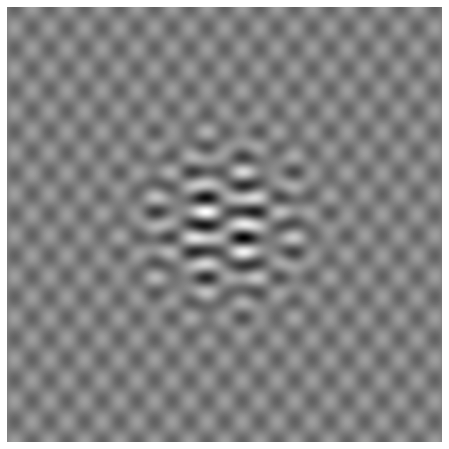

In [7]:
# Artificial picture
t = np.arange(-3,3,0.01)

Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

X = Utrue @ Strue @ Vtrue.T

show_pic(X)

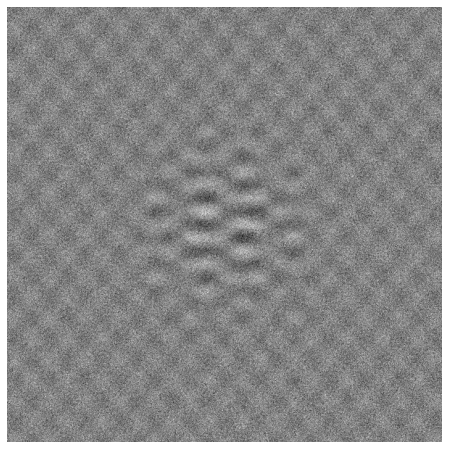

In [8]:
# Artificial picture with Gaussian white nois
sigma = 1 #noise magnitude
Xnoisy = X + sigma*np.random.randn(*X.shape)

show_pic(Xnoisy)

56.56854249492381 1


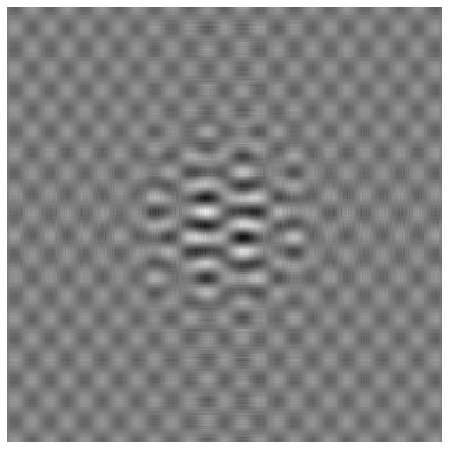

In [10]:
# Hard threshold with noise magnitude (sigma) = 1
U, S, VT = np.linalg.svd(Xnoisy,full_matrices=0)
N = Xnoisy.shape[0]
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma # Hard threshold
r = np.max(np.where(S > cutoff)) # Keep modes w/ sig > cutoff
print(cutoff,r)
Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]

show_pic(Xclean)

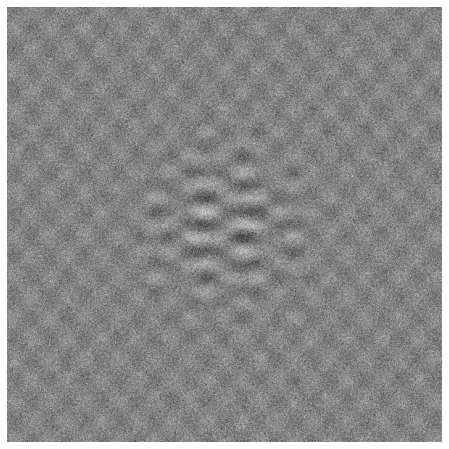

In [11]:
# Hard threshold based on cumulative energy
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy
print(r90)
X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]

show_pic(X90)

<ipython-input-23-c3357f3142ce>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.semilogy(S,'-o', color='k', LineWidth=2)
<ipython-input-23-c3357f3142ce>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.semilogy(np.diag(S[:(r+1)]),'o', color='r', LineWidth=2)
<ipython-input-23-c3357f3142ce>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', LineWidth=2)
<ipython-input-23-c3357f3142ce>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  rect = patches.Rectangle((-5,20),100,200,LineWidth=2,LineStyle='--',FaceColor='none',EdgeColor='k')
<ipython-input-23-c335

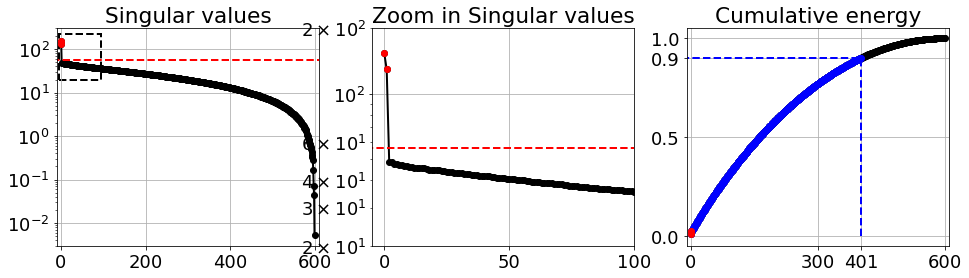

In [23]:
## Plot Singular Values
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(131)

ax1.semilogy(S,'-o', color='k', LineWidth=2)
ax1.semilogy(np.diag(S[:(r+1)]),'o', color='r', LineWidth=2)
ax1.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', LineWidth=2)
rect = patches.Rectangle((-5,20),100,200,LineWidth=2,LineStyle='--',FaceColor='none',EdgeColor='k')
ax1.add_patch(rect)
plt.xlim((-10,610))
plt.ylim((0.003,300))
ax1.set_title("Singular values")
ax1.grid()


ax2 = fig.add_subplot(132)

ax2.semilogy(S,'-o', color='k', LineWidth=2)
ax2.semilogy(np.diag(S[:(r+1)]),'o', color='r', LineWidth=2)
ax2.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', LineWidth=2)
plt.xlim((-5,100))
plt.ylim((20,200))
ax2.set_title("Zoom in Singular values")
ax2.grid()

ax3 = fig.add_subplot(133)
ax3.plot(cdS,'-o',color='k',LineWidth=2)
ax3.plot(cdS[:(r90+1)],'o',color='b',LineWidth=2)
ax3.plot(cdS[:(r+1)],'o',color='r',LineWidth=2)
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90, r90, -10]),np.array([0, 0.9, 0.9]),'--',color='b',LineWidth=2)
ax3.set_title("Cumulative energy")
ax3.grid()
plt.show()

# Alignment

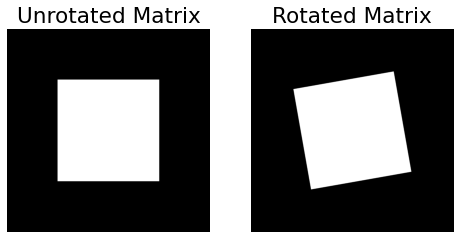

In [30]:
n = 1000
q = int(n/4)
# Create black background
X = np.zeros((n,n))
# Create a white square in the middle with size 250
X[(q-1):(3*q),(q-1):(3*q)] = 1

X_rot = skimage.transform.rotate(X,10)
X_rot[np.nonzero(X_rot)] = 1

plt.subplot(1,2,1)
show_pic(X)
plt.title('Unrotated Matrix')
plt.subplot(1,2,2)
show_pic(X_rot)
plt.title('Rotated Matrix')
plt.show()



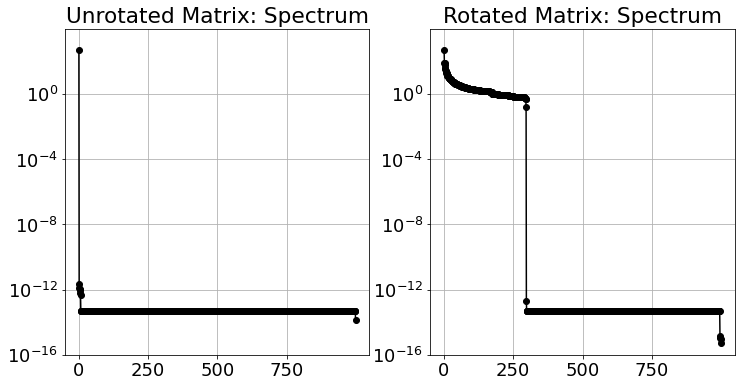

In [33]:
U, S, VT = np.linalg.svd(X,full_matrices=0)
U_rot, S_rot, VT_rot = np.linalg.svd(X_rot,full_matrices=0)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.semilogy(S,'-o',color='k')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.title('Unrotated Matrix: Spectrum')

plt.subplot(1,2,2)
plt.semilogy(S_rot,'-o',color='k')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.title('Rotated Matrix: Spectrum')

plt.show()

<ipython-input-42-fac4e677830f>:21: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_bad(alpha = 0.0)
<ipython-input-42-fac4e677830f>:33: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[1].axis('on')


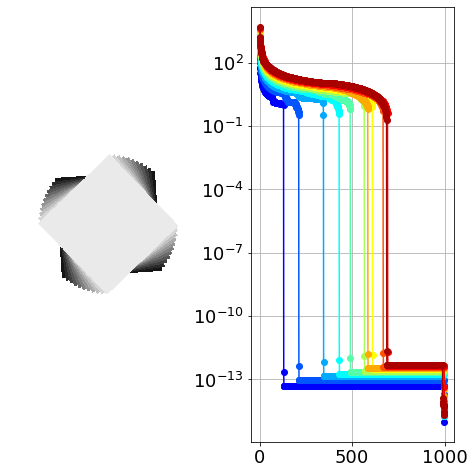

<Figure size 864x288 with 0 Axes>

In [42]:
Xrot = X
nAngles = 12

fig, axs = plt.subplots(1,2)
plt.figure(figsize=(12,4))
cm_np = np.array([[0,0,2/3],
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])


cmap = plt.cm.jet
cmap.set_bad(alpha = 0.0)
for j in range(nAngles):
    Xrot = skimage.transform.rotate(X,j*4) #rotate by theta = j*4 degrees
    Xrot[np.nonzero(Xrot)] = j

    U, S, VT = np.linalg.svd(Xrot)

    axs[0].imshow(np.ma.masked_where(Xrot == 0, Xrot),vmin=0,vmax=nAngles)
    #plt.set_cmap(cmap)
    axs[0].axis('off')

    axs[1].semilogy(S,'-o',color=tuple(cm_np[j]))
    axs[1].axis('on')
    axs[1].grid(1)

plt.show()
